# In the name of God
## Department of Electrical Engineering at sharif University of Technology
## DEEP LEARNING HW1 
## Name: M.Sina Hasan-nia 
## ID_NUMBER : 96108515

## Imports
In this part we implement the libraries we need in the rest of the project

In [37]:
import math
import tensorflow as tf
# switchd TF2 to TF1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## 1. visulalize the 25 data of data set
in this section our goal is to visualize the first 25 data  of the dataset. in order to achieve this goal we first standardize the data and then map labels to the charachters. we use the following syntax :
chr(ord('`')+ X_label_arr[i]+1) 
where X_label_arr[i] is the label of i-th data. After doing all above we plot the first 25 data of the dataset.

In [38]:
X= pd.read_csv("Q1_train.csv", sep = ',')  
X_feautures = X.iloc[:,1:785] / 255
X_label = X.iloc[:,0]
X_feautures_arr = X_feautures.to_numpy()
X_label_arr = X_label.to_numpy()
X_leabels_characterized =[]
for i in range(len(X_label_arr)):
    X_leabels_characterized.append(chr(ord('`')+X_label_arr[i]+1)) 

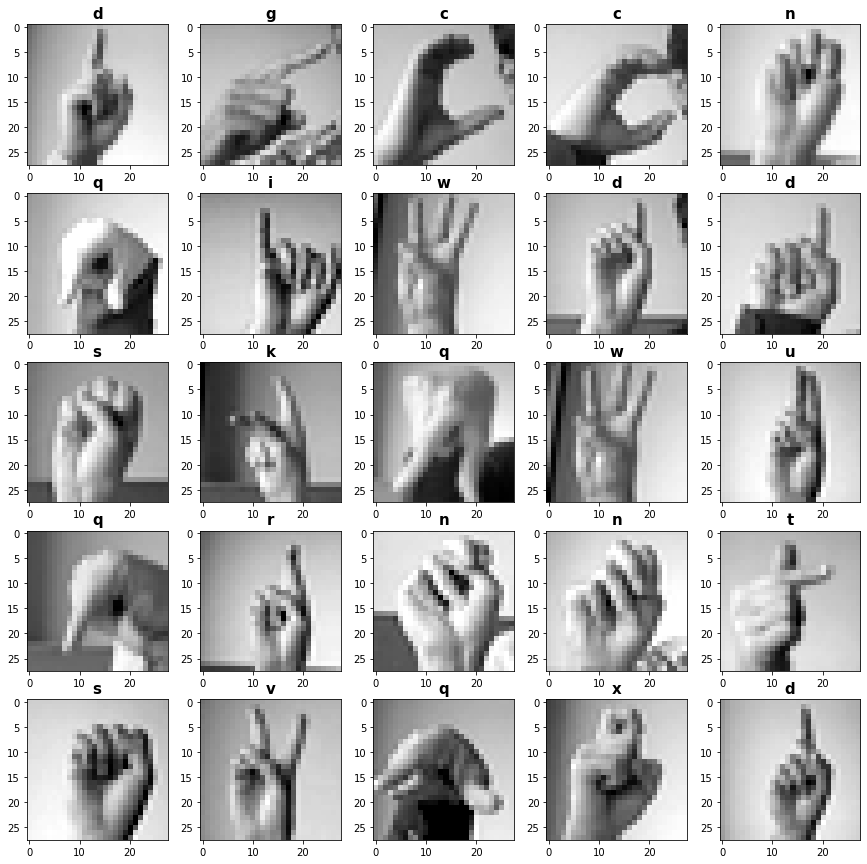

In [39]:
fig = plt.figure(figsize=(15, 15))
for sample_num_i in range(25):
    plt.subplot(5, 5, sample_num_i+1)
    show_img = X_feautures_arr[sample_num_i][:].reshape(28, 28)
    label = X_leabels_characterized[sample_num_i]
    plt.title(label,fontsize = 15 ,fontweight ='bold')
    plt.imshow(show_img, cmap='gray');   

## 2. Classifying with SGD & ADAM
in this part the goals are spilitting the dataset into training data and validation data, train netwoks using SGD & ADAM algorythms

### 2.0.1 : SPLITTING VALIDATION & Training data
in this part we  shuffle the data and spilit it into validation data and training data. we also split features and labels of the dataset too!

In [40]:
## shuffling the data 
seed = 2021
with tf.Session() as sess:
    X_features_shuffled = sess.run(tf.random.shuffle(X_feautures_arr, seed=seed ))
    X_label_shuffled = sess.run(tf.random.shuffle(X_label_arr, seed=seed ))
## spiliting dataset in to train and validation data
train2valid_spliter_ratio = 0.3
num_dastaset = X_features_shuffled.shape[0]
num_valid = int(train2valid_spliter_ratio*num_dastaset)
num_train = num_dastaset-num_valid
##
X_features_train = X_features_shuffled[:num_train]
X_label_train = X_label_shuffled[:num_train]
X_features_valid = X_features_shuffled[num_train:]
X_label_valid = X_label_shuffled[num_train:]
## one hot the outputs 
with tf.Session() as sess:
    X_label_train_one_hot = sess.run(tf.one_hot(X_label_train, 25))
    X_label_valid_one_hot = sess.run(tf.one_hot(X_label_valid, 25))
print("num_dastaset\t{} ". format(num_dastaset))
print("num_valid\t{} ".format(num_valid))
print("num_train\t{} ".format(num_train))
print("X_features_train\t{} ".format(X_features_train.shape))
print("X_label_train\t{} ".format(X_features_valid.shape))
print("X_features_valid\t{} ".format(X_label_train.shape))
print("X_label_valid\t{} ".format(X_label_valid.shape))


num_dastaset	27455 
num_valid	8236 
num_train	19219 
X_features_train	(19219, 784) 
X_label_train	(8236, 784) 
X_features_valid	(19219,) 
X_label_valid	(8236,) 


### 2.0.2 : Crucial main Functions
this part is the main part of our project. all of the functions that we need in the rest of the project were added to this section. Most of this functions are implemented in order to creat the network

In [41]:
def WEIGHT(shape , name ,stddev1, seed ) :
    return tf.get_variable(dtype=tf.float32, shape = shape , name='W_'+name,
                          initializer = tf.truncated_normal_initializer(stddev = stddev1 ))
def BIAS (shape , name) :
    return tf.get_variable(dtype=tf.float32,shape=shape, name='B_'+ name,
                  initializer= tf.zeros_initializer())
def FCn0(X,num_units,name,stddev1,relu = False) : 
    # X : input vector
    # num_units : number of next layer neurons
    # an string which specifies each layer name
    # Relu : for applying relu 
    in_dim = X.get_shape()[1]
    W = WEIGHT ((in_dim , num_units) , name , stddev1,seed =2021)
    B = BIAS ((num_units) , name)
    H = tf.matmul (X , W, name= 'H_'+name)
    O = tf.add(H,B,name='O_'+name)
    if relu == True:
        O = tf.nn.relu(O,name = 'ORelu_'+name)
    return O
def FCn0_tensorboard(X,num_units,name,stddev1,relu = False) : 
    # X : input vector
    # num_units : number of next layer neurons
    # an string which specifies each layer name
    # Relu : for applying relu 
    in_dim = X.get_shape()[1]
    W = WEIGHT ((in_dim , num_units) , name , stddev1,seed =2021)
    B = BIAS ((num_units) , name)
    H = tf.matmul (X , W, name= 'H_'+name)
    O = tf.add(H,B,name='O_'+name)
    if relu == True:
        O = tf.nn.relu(O,name = 'ORelu_'+name)
    return O,W,B
def FCN_DROP_out(X,num_units,name,stddev1,keep_prob,relu = False,dropout=False) : 
    # X : input vector
    # num_units : number of next layer neurons
    # an string which specifies each layer name
    # Relu : for applying relu 
    in_dim = X.get_shape()[1]
    W = WEIGHT ((in_dim , num_units) , name , stddev1,seed =2021)
    B = BIAS ((num_units) , name)
    H = tf.matmul (X , W, name= 'H_'+name)
    O = tf.add(H,B,name='O_'+name)
    if relu == True:
        O = tf.nn.relu(O,name = 'ORelu_'+name)
    if dropout == True:
        O = tf.nn.dropout(O, keep_prob)
    return O
def FCN_Batch_norm(X,num_units,name,stddev1,epsilon,relu = False) : 
    # X : input vector
    # num_units : number of next layer neurons
    # an string which specifies each layer name
    # Relu : for applying relu 
    in_dim = X.get_shape()[1]
    W = WEIGHT ((in_dim , num_units) , name , stddev1,seed =2021)
    H = tf.matmul (X , W, name= 'H_'+name)
    batch_mean1, batch_var1 = tf.nn.moments(H,[0])
    scale1 = tf.Variable(tf.ones([num_units]))
    beta1 = tf.Variable(tf.zeros([num_units]))
    BN1 = tf.nn.batch_normalization(H,batch_mean1,batch_var1,beta1,scale1,epsilon)
    if relu == True:
        O = tf.nn.relu(BN1,name = 'ORelu_'+name)
    return O

### 2.1 : TRAIN MLP WITH Adam OPTIMIZER
in this section we first create the graph and then train the neural network by using the ADAM algorythm. we also use some other functions for implementing the tensorBoard. 

#### 2.1.1 : creating the network

In [42]:
tf.reset_default_graph()
inputsize = 784
layer1size = 512
layer2size = 512
layer3size = 512
layer4size = 25
input_image=tf.placeholder(dtype=tf.float32, shape=(None, 784), name='INPUT')
O1,W1,B1 = FCn0_tensorboard(input_image,layer1size,name='layer1',stddev1=np.sqrt(4/(inputsize+layer1size)),relu=True)
O2,W2,B2 = FCn0_tensorboard(O1,layer2size,name='layer2',relu=True ,stddev1=np.sqrt(4/(layer1size+layer2size)))
O3,W3,B3 = FCn0_tensorboard(O2,layer3size,name='layer3',relu=True ,stddev1=np.sqrt(4/(layer2size+layer3size)))
O4,W4,B4 = FCn0_tensorboard(O3,layer4size,name='layer4',relu=False ,stddev1=np.sqrt(4/(layer3size+layer4size)))
output_image=tf.placeholder(dtype=tf.float32, shape=(None, 25),name='OUTPUT')

W1_sum = tf.summary.histogram ('histogram_of_W1', W1)
B1_sum = tf.summary.histogram ('histogram_of_B1', B1)
W2_sum = tf.summary.histogram ('histogram_of_W2', W2)
B2_sum = tf.summary.histogram ('histogram_of_B2', B2)
W3_sum = tf.summary.histogram ('histogram_of_W3', W3)
B3_sum = tf.summary.histogram ('histogram_of_B3', B3)
W4_sum = tf.summary.histogram ('histogram_of_W4', W4)
B4_sum = tf.summary.histogram ('histogram_of_B4', B4)


#### 2.1.2 define loss function,accuracy and optimizer

In [43]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= O4,name='LOSS'))
accuracy = tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(O4,axis=1),tf.argmax(output_image, axis=1)),dtype=tf.float32))
adam=tf.train.AdamOptimizer (learning_rate=0.0005, name='adam').minimize(loss)
loss_tensorboard=tf.summary.scalar('Fluction', loss)

#### 2.1.3 define Test data

In [44]:
Y= pd.read_csv("Q1_test.csv", sep = ',')
Y_feautures = Y.iloc[:,1:785]/255
Y_label = Y.iloc[:,0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    Y_label_train_one_hot = sess.run(tf.one_hot(Y_label, 25))
    f_test={input_image:Y_feautures , output_image:Y_label_train_one_hot}

#### 2.1.4 Train data

In [45]:
batchsize = 150
epoch_num = 40
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer()) 
valid_err = np.zeros(epoch_num)
test_err =  np.zeros(epoch_num)
accuracy_valid = np.zeros(epoch_num)
accuracy_test = np.zeros(epoch_num)
train_err = np.zeros(epoch_num)
accuracy_train = np.zeros(epoch_num)
write = tf.summary.FileWriter('./graphs', sess.graph)
for epoch in range(epoch_num):
    print('==================================================')
    print('====== Epoch=%s =================================== ' %(epoch))
    print('==================================================')
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:X_features_train[i*batchsize : (i+1)*batchsize] , 
          output_image:X_label_train_one_hot[i*batchsize : (i+1)*batchsize] }
        sess.run(adam,feed_dict=f)
    print("iter {}: \t Loss={:.6f} \t Training Accuaracy={:.6f}".format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))    
    f_valid={input_image:X_features_valid , output_image:X_label_valid_one_hot}
    f_train={input_image:X_features_train , output_image:X_label_train_one_hot}
    valid_err[epoch] = sess.run(loss,feed_dict=f_valid)
    test_err[epoch] = sess.run(loss,feed_dict=f_test)
    train_err[epoch] = sess.run(loss,feed_dict=f_train)
    accuracy_valid[epoch] =  sess.run(accuracy,feed_dict=f_valid)
    accuracy_test[epoch] =  sess.run(accuracy,feed_dict=f_test)
    accuracy_train[epoch] =  sess.run(accuracy,feed_dict=f_train)
    write.add_summary(sess.run(loss_tensorboard,feed_dict=f_train),epoch)
    ##
    write.add_summary(sess.run(W1_sum,feed_dict=f_train),epoch)
    write.add_summary(sess.run(B1_sum,feed_dict=f_train),epoch)
    write.add_summary(sess.run(W2_sum,feed_dict=f_train),epoch)
    write.add_summary(sess.run(B2_sum,feed_dict=f_train),epoch)
    write.add_summary(sess.run(W3_sum,feed_dict=f_train),epoch)
    write.add_summary(sess.run(B3_sum,feed_dict=f_train),epoch)
    write.add_summary(sess.run(W4_sum,feed_dict=f_train),epoch)
    write.add_summary(sess.run(B4_sum,feed_dict=f_train),epoch)
    ##
    
    print("-----------------------------------------------------")
    print('Epoch:{} \t Validation Loss:{:.6f} \t Validation accuaracy:{:.6f} '.format(epoch,valid_err[epoch],accuracy_valid[epoch]))
    print('Epoch:{} \t test Loss:{:.6f}       \t test accuaracy:{:.6f} '.format(epoch,test_err[epoch],accuracy_test[epoch]))
    print('Epoch:{} \t training Loss:{:.6f}   \t Training accuaracy:{:.6f} '.format(epoch,train_err[epoch],accuracy_train[epoch]))
    print("-----------------------------------------------------")

C:\Users\Sun Media\.conda\envs\DL\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


====== Epoch=0 =================================== 
iter 127: 	 Loss=1.274869 	 Training Accuaracy=0.606667
-----------------------------------------------------
Epoch:0 	 Validation Loss:1.230601 	 Validation accuaracy:0.620325 
Epoch:0 	 test Loss:1.470556       	 test accuaracy:0.546570 
Epoch:0 	 training Loss:1.230724   	 Training accuaracy:0.623081 
-----------------------------------------------------
====== Epoch=1 =================================== 
iter 127: 	 Loss=0.859553 	 Training Accuaracy=0.713333
-----------------------------------------------------
Epoch:1 	 Validation Loss:0.784051 	 Validation accuaracy:0.739558 
Epoch:1 	 test Loss:1.185486       	 test accuaracy:0.622978 
Epoch:1 	 training Loss:0.779392   	 Training accuaracy:0.743119 
-----------------------------------------------------
====== Epoch=2 =================================== 
iter 127: 	 Loss=0.502940 	 Training Accuaracy=0.853333
-----------------------------------------------------
Epoch:2 	 Vali

iter 127: 	 Loss=0.002400 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:16 	 Validation Loss:0.002533 	 Validation accuaracy:1.000000 
Epoch:16 	 test Loss:0.901029       	 test accuaracy:0.806470 
Epoch:16 	 training Loss:0.002199   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=17 =================================== 
iter 127: 	 Loss=0.002060 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:17 	 Validation Loss:0.002190 	 Validation accuaracy:1.000000 
Epoch:17 	 test Loss:0.903318       	 test accuaracy:0.812883 
Epoch:17 	 training Loss:0.001892   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=18 =================================== 
iter 127: 	 Loss=0.001678 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:18 	 Validation Loss:0.001780 	 Validation accuaracy

iter 127: 	 Loss=0.000333 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:32 	 Validation Loss:0.000324 	 Validation accuaracy:1.000000 
Epoch:32 	 test Loss:1.040463       	 test accuaracy:0.815393 
Epoch:32 	 training Loss:0.000261   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=33 =================================== 
iter 127: 	 Loss=0.000300 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:33 	 Validation Loss:0.000295 	 Validation accuaracy:1.000000 
Epoch:33 	 test Loss:1.049161       	 test accuaracy:0.815254 
Epoch:33 	 training Loss:0.000237   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=34 =================================== 
iter 127: 	 Loss=0.000270 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:34 	 Validation Loss:0.000265 	 Validation accuaracy

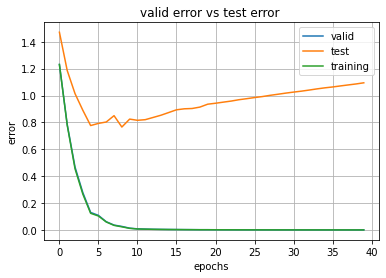

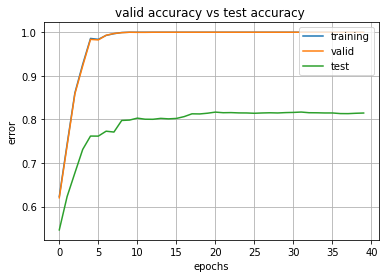

In [46]:
plt.figure()

plt.title("valid error vs test error ")
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(valid_err, label = "valid")
plt.plot(test_err , label = "test")
plt.plot(train_err , label = "training")
plt.legend(loc='upper right')
plt.grid()
plt.show()
plt.figure()
plt.title("valid accuracy vs test accuracy ")
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(accuracy_train, label = "training")
plt.plot(accuracy_valid, label = "valid")
plt.plot(accuracy_test , label = "test")
plt.legend(loc='upper right')
plt.grid()
plt.show()


### 2.2 : TRAIN MLP WITH SGD OPTIMIZER
these part is mainly as same as the ADAM optmizer part. the difference is that in this part we use SGD algorythm instead of ADAM algorythm. 

In [11]:
tf.reset_default_graph()
inputsize = 784
layer1size = 512
layer2size = 512
layer3size = 512
layer4size = 25
input_image=tf.placeholder(dtype=tf.float32, shape=(None, 784), name='INPUT')
O1 = FCn0(input_image,layer1size,name='layer1',stddev1=np.sqrt(4/(inputsize+layer1size)),relu=True)
O2 = FCn0(O1,layer2size,name='layer2',relu=True ,stddev1=np.sqrt(4/(layer1size+layer2size)))
O3 = FCn0(O2,layer3size,name='layer3',relu=True ,stddev1=np.sqrt(4/(layer2size+layer3size)))
O4 = FCn0(O3,layer4size,name='layer4',relu=False ,stddev1=np.sqrt(4/(layer3size+layer4size)))
output_image=tf.placeholder(dtype=tf.float32, shape=(None, 25),name='OUTPUT')


In [12]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= O4,name='LOSS'))
accuracy = tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(O4,axis=1),tf.argmax(output_image, axis=1)),dtype=tf.float32))
SGD=tf.train.GradientDescentOptimizer (learning_rate=0.1, name='GradientDescentOptimizer').minimize(loss)

In [13]:
Y= pd.read_csv("Q1_test.csv", sep = ',')
Y_feautures = Y.iloc[:,1:785]/255
Y_label = Y.iloc[:,0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    Y_label_train_one_hot = sess.run(tf.one_hot(Y_label, 25))
    f_test={input_image:Y_feautures , output_image:Y_label_train_one_hot}

In [14]:
batchsize = 150
epoch_num = 30
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer()) 
valid_err = np.zeros(epoch_num)
test_err =  np.zeros(epoch_num)
accuracy_valid = np.zeros(epoch_num)
accuracy_test = np.zeros(epoch_num)
train_err = np.zeros(epoch_num)
accuracy_train = np.zeros(epoch_num)
for epoch in range(epoch_num):
    print('==================================================')
    print('====== Epoch=%s =================================== ' %(epoch))
    print('==================================================')
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:X_features_train[i*batchsize : (i+1)*batchsize] , 
          output_image:X_label_train_one_hot[i*batchsize : (i+1)*batchsize] }
        sess.run(SGD,feed_dict=f)
    print("iter {}: \t Loss={:.6f} \t Training Accuaracy={:.6f}".format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))    
    f_valid={input_image:X_features_valid , output_image:X_label_valid_one_hot}
    f_train={input_image:X_features_train , output_image:X_label_train_one_hot}
    valid_err[epoch] = sess.run(loss,feed_dict=f_valid)
    test_err[epoch] = sess.run(loss,feed_dict=f_test)
    train_err[epoch] = sess.run(loss,feed_dict=f_train)
    accuracy_valid[epoch] =  sess.run(accuracy,feed_dict=f_valid)
    accuracy_test[epoch] =  sess.run(accuracy,feed_dict=f_test)
    accuracy_train[epoch] =  sess.run(accuracy,feed_dict=f_train)
    print("-----------------------------------------------------")
    print('Epoch:{} \t Validation Loss:{:.6f} \t Validation accuaracy:{:.6f} '.format(epoch,valid_err[epoch],accuracy_valid[epoch]))
    print('Epoch:{} \t test Loss:{:.6f}       \t test accuaracy:{:.6f} '.format(epoch,test_err[epoch],accuracy_test[epoch]))
    print('Epoch:{} \t training Loss:{:.6f}   \t Training accuaracy:{:.6f} '.format(epoch,train_err[epoch],accuracy_train[epoch]))
    print("-----------------------------------------------------")

C:\Users\Sun Media\.conda\envs\DL\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


====== Epoch=0 =================================== 
iter 127: 	 Loss=2.522068 	 Training Accuaracy=0.240000
-----------------------------------------------------
Epoch:0 	 Validation Loss:2.478032 	 Validation accuaracy:0.271370 
Epoch:0 	 test Loss:2.486094       	 test accuaracy:0.281511 
Epoch:0 	 training Loss:2.484113   	 Training accuaracy:0.265623 
-----------------------------------------------------
====== Epoch=1 =================================== 
iter 127: 	 Loss=2.393144 	 Training Accuaracy=0.266667
-----------------------------------------------------
Epoch:1 	 Validation Loss:2.390995 	 Validation accuaracy:0.269791 
Epoch:1 	 test Loss:2.424318       	 test accuaracy:0.256414 
Epoch:1 	 training Loss:2.400051   	 Training accuaracy:0.259899 
-----------------------------------------------------
====== Epoch=2 =================================== 
iter 127: 	 Loss=1.639576 	 Training Accuaracy=0.513333
-----------------------------------------------------
Epoch:2 	 Vali

iter 127: 	 Loss=0.106093 	 Training Accuaracy=0.980000
-----------------------------------------------------
Epoch:16 	 Validation Loss:0.141108 	 Validation accuaracy:0.961875 
Epoch:16 	 test Loss:0.707282       	 test accuaracy:0.778862 
Epoch:16 	 training Loss:0.136027   	 Training accuaracy:0.965659 
-----------------------------------------------------
====== Epoch=17 =================================== 
iter 127: 	 Loss=0.028359 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:17 	 Validation Loss:0.039940 	 Validation accuaracy:0.996357 
Epoch:17 	 test Loss:0.634901       	 test accuaracy:0.809258 
Epoch:17 	 training Loss:0.037095   	 Training accuaracy:0.996826 
-----------------------------------------------------
====== Epoch=18 =================================== 
iter 127: 	 Loss=0.028483 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:18 	 Validation Loss:0.033057 	 Validation accuaracy

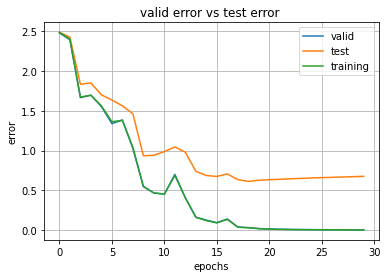

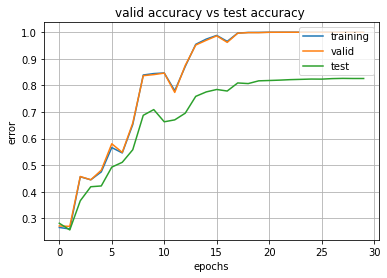

In [15]:
plt.figure()

plt.title("valid error vs test error ")
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(valid_err, label = "valid")
plt.plot(test_err , label = "test")
plt.plot(train_err , label = "training")
plt.legend(loc='upper right')
plt.grid()
plt.show()
plt.figure()
plt.title("valid accuracy vs test accuracy ")
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(accuracy_train, label = "training")
plt.plot(accuracy_valid, label = "valid")
plt.plot(accuracy_test , label = "test")
plt.legend(loc='upper right')
plt.grid()
plt.show()


### 2.3 : Conclusion

##### ADAM Vs SGD

َ1- Adam optimizer and SGD optimizer can be explained as a mathematical function to modify the weights of the network given the gradients and additional information, depending on the formulation of the optimizer.SGD is a variant of gradient descent. Instead of performing computations on the whole dataset which is inefficient SGD only computes on a small subset or random selection of data examples. SGD produces the same performance as regular gradient descent when the learning rate is low. Adam technique combines the advantages of two SGD extensions — Root Mean Square Propagation (RMSProp) and Adaptive Gradient Algorithm (AdaGrad) — and computes individual adaptive learning rates for different parameters.Despite all the advantages of using Adam it can fail to converge to an optimal solution under specific settings.Adam generalize poorly compared to SGD.Adam optimizer also introduces two new hyperparameters and complicates the hyperparameter tuning problem. According to the above results Adam converges faster than SGD. generally Adam has designed for large datasets.scientists in some papers have argued that SGD is conceptually stable for convex and continuous optimization. in this Hw there isn't significant differences in convergence of the two algorythms but as meantioned above ADAM can train with higher lr. the convergence of the Adam was faster in this problem. 
"AdaBound" is a technique that can train machine learning models “as fast as Adam and as good as SGD.” Basically, AdaBound is an Adam variant that employs dynamic bounds on learning rates to achieve a gradual and smooth transition to SGD.



##### TensorBoard

هیستوگرام ها به طور کلی برای نمایش وزن ها در طول زمان استفاده می شود که در یک بعد مقادیر و در بعد دیگر ایپاک ها و در بعد دیگر چگالی مقادیر متناسب با بعد 1 به دست می آید . از داده های به دست آمده برای تنسور برد می فهمیم که لرنینگ ریت عدد مناسبی است. همچنین می فهمیم که مقادیر اولیه مناسب می باشد.  اگر به شکل های دو بعدی نگاه کنیم متوجه می شویم که مقادیر ما بیشتر در نقاط پررنگ تر (گرم تر ) قرار دارد . همچنین می توان فهمید که هنگامی که شبکه به سمت ترین شدن حرکت می کند این تغییرات نقاط گرم تر به چه سمتی می رود .به عبارت دبگر به مرور که جلو آمدیم نشان می دهد که چگونه وزن ها توزیع شده است .  
همانطور که دیده می شود در ابتدای آموزش خطای آموزش و داده های تست بالاست . با اعمال تکنینک هایی نظیر آدام سعی می کنیم شبکه را برای داده های آموزش آموزش دهیم. بنابراین انتظار داریم که با گذشت ایپاک های مختلف خطای آموزش ما کم شود.شکل خطای بدست آمده برای آموزش نیز این را تایید می کند . برای داده های ارزیابی انتظار داریم که چون شبکه روی آن ها آموزش نمی بیند با گذست ایپاک های مختلف ابتدا کم شود و سپس اگر ایپاک ها زیاد باشد افزایش یابد اما به نظر می رسد توزیع این داده ها همانند داده های آموزش می باشد بنابراین برای این داده ها نیز مانند داده های آموزش شاهد یک نزول می باشیم. برای داده های تست نیز انتظارمان این است که ابتدا خطا کاهش یابد اما اگر تعداد ایپاک ها زیاد باشد خطا افزایش پیدا کند یعنی شبکه اورفیت کند زیرا به جای آموزش دیگر داده ها را حفظ می کند.  نمودار های به دست آمده برای داده تست به صورت کامل با انتظاراتمان مطابقت دارد.بدیهی است برای آن که از شبکه استفاده کنیم نباید آن را تا ایپاک 39 آموزش دهیم چون شبکه اورفیت شده است . همانطور که در کلاس گفته شده است باید از تکنیکی استفاده کنیم به نام ارلی استاپینگ تا اورفیت نکنیم!
 

## 3.DROP OUT

In [16]:
tf.reset_default_graph()
prob = tf.placeholder(dtype=tf.float32, name= 'prob')
input_image=tf.placeholder(dtype=tf.float32, shape=(None, 784), name='input')
inputsize = 784
layer1size = 512
layer2size = 512
layer3size = 512
layer4size = 25
O1 = FCN_DROP_out(input_image,layer1size,name='layer1',stddev1=np.sqrt(4/(inputsize+layer1size)),relu=True,dropout=True,keep_prob=prob)
O2 = FCN_DROP_out(O1,layer2size,name='layer2',relu=True ,stddev1=np.sqrt(4/(layer1size+layer2size)),dropout=True,keep_prob=prob)
O3 = FCN_DROP_out(O2,layer3size,name='layer3',relu=True ,stddev1=np.sqrt(4/(layer2size+layer3size)),dropout=True,keep_prob=prob)
O4 = FCN_DROP_out(O3,layer4size,name='layer4',relu=False ,stddev1=np.sqrt(4/(layer3size+layer4size)),dropout=False,keep_prob=1)
output_image=tf.placeholder(dtype=tf.float32, shape=(None, 25),name='OUTPUT')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
loss_regularized= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= O4,name='LOSS'))
accuracy_regularized = tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(O4,axis=1),tf.argmax(output_image, axis=1)),dtype=tf.float32))
adam_regularized=tf.train.AdamOptimizer (learning_rate=0.0005, name='adam').minimize(loss_regularized)

In [18]:
Y= pd.read_csv("Q1_test.csv", sep = ',')
Y_feautures = Y.iloc[:,1:785]/255
Y_label = Y.iloc[:,0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    Y_label_train_one_hot = sess.run(tf.one_hot(Y_label, 25))
    f_test={input_image:Y_feautures , output_image:Y_label_train_one_hot,prob:1}

In [19]:
batchsize = 150
epoch_num = 40
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer()) 
valid_err_regularized = np.zeros(epoch_num)
test_err_regularized =  np.zeros(epoch_num)
accuracy_valid_regularized = np.zeros(epoch_num)
accuracy_test_regularized = np.zeros(epoch_num)
train_err_regularized = np.zeros(epoch_num)
accuracy_train_regularized = np.zeros(epoch_num)
for epoch in range(epoch_num):
    print('==================================================')
    print('====== Epoch=%s =================================== ' %(epoch))
    print('==================================================')
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:X_features_train[i*batchsize : (i+1)*batchsize] , 
          output_image:X_label_train_one_hot[i*batchsize : (i+1)*batchsize],prob:0.6}
        sess.run(adam_regularized,feed_dict=f)
    print("iter {}: \t Loss={:.6f} \t Training Accuaracy={:.6f}".format(i,sess.run(loss_regularized,feed_dict=f),sess.run(accuracy_regularized,feed_dict=f)))    
    f_valid={input_image:X_features_valid , output_image:X_label_valid_one_hot,prob:1}
    f_train={input_image:X_features_train , output_image:X_label_train_one_hot,prob:0.6}
    valid_err_regularized[epoch] = sess.run(loss_regularized,feed_dict=f_valid)
    test_err_regularized[epoch] = sess.run(loss_regularized,feed_dict=f_test)
    train_err_regularized[epoch] = sess.run(loss_regularized,feed_dict=f_train)
    accuracy_valid_regularized[epoch] =  sess.run(accuracy_regularized,feed_dict=f_valid)
    accuracy_test_regularized[epoch] =  sess.run(accuracy_regularized,feed_dict=f_test)
    accuracy_train_regularized[epoch] =  sess.run(accuracy_regularized,feed_dict=f_train)
    print("-----------------------------------------------------")
    print('Epoch:{} \t Validation Loss:{:.6f} \t Validation accuaracy:{:.6f} '.format(epoch,valid_err_regularized[epoch],accuracy_valid_regularized[epoch]))
    print('Epoch:{} \t test Loss:{:.6f}       \t test accuaracy:{:.6f} '.format(epoch,test_err_regularized[epoch],accuracy_test_regularized[epoch]))
    print('Epoch:{} \t training Loss:{:.6f}   \t Training accuaracy:{:.6f} '.format(epoch,train_err_regularized[epoch],accuracy_train_regularized[epoch]))
    print("-----------------------------------------------------")

C:\Users\Sun Media\.conda\envs\DL\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


====== Epoch=0 =================================== 
iter 127: 	 Loss=2.494514 	 Training Accuaracy=0.240000
-----------------------------------------------------
Epoch:0 	 Validation Loss:2.132622 	 Validation accuaracy:0.391938 
Epoch:0 	 test Loss:2.203320       	 test accuaracy:0.340351 
Epoch:0 	 training Loss:2.375703   	 Training accuaracy:0.246371 
-----------------------------------------------------
====== Epoch=1 =================================== 
iter 127: 	 Loss=2.000086 	 Training Accuaracy=0.366667
-----------------------------------------------------
Epoch:1 	 Validation Loss:1.517808 	 Validation accuaracy:0.541889 
Epoch:1 	 test Loss:1.675094       	 test accuaracy:0.480898 
Epoch:1 	 training Loss:1.852359   	 Training accuaracy:0.385244 
-----------------------------------------------------
====== Epoch=2 =================================== 
iter 127: 	 Loss=1.672197 	 Training Accuaracy=0.400000
-----------------------------------------------------
Epoch:2 	 Vali

iter 127: 	 Loss=0.734206 	 Training Accuaracy=0.760000
-----------------------------------------------------
Epoch:16 	 Validation Loss:0.268166 	 Validation accuaracy:0.931884 
Epoch:16 	 test Loss:0.807632       	 test accuaracy:0.749721 
Epoch:16 	 training Loss:0.723427   	 Training accuaracy:0.742442 
-----------------------------------------------------
====== Epoch=17 =================================== 
iter 127: 	 Loss=0.638207 	 Training Accuaracy=0.793333
-----------------------------------------------------
Epoch:17 	 Validation Loss:0.196047 	 Validation accuaracy:0.953011 
Epoch:17 	 test Loss:0.714678       	 test accuaracy:0.771194 
Epoch:17 	 training Loss:0.540486   	 Training accuaracy:0.811020 
-----------------------------------------------------
====== Epoch=18 =================================== 
iter 127: 	 Loss=0.574475 	 Training Accuaracy=0.840000
-----------------------------------------------------
Epoch:18 	 Validation Loss:0.190897 	 Validation accuaracy

iter 127: 	 Loss=0.268876 	 Training Accuaracy=0.840000
-----------------------------------------------------
Epoch:32 	 Validation Loss:0.073116 	 Validation accuaracy:0.987615 
Epoch:32 	 test Loss:0.635096       	 test accuaracy:0.788204 
Epoch:32 	 training Loss:0.348779   	 Training accuaracy:0.884802 
-----------------------------------------------------
====== Epoch=33 =================================== 
iter 127: 	 Loss=0.417009 	 Training Accuaracy=0.866667
-----------------------------------------------------
Epoch:33 	 Validation Loss:0.094035 	 Validation accuaracy:0.981666 
Epoch:33 	 test Loss:0.676909       	 test accuaracy:0.780117 
Epoch:33 	 training Loss:0.419042   	 Training accuaracy:0.859514 
-----------------------------------------------------
====== Epoch=34 =================================== 
iter 127: 	 Loss=0.425380 	 Training Accuaracy=0.806667
-----------------------------------------------------
Epoch:34 	 Validation Loss:0.096978 	 Validation accuaracy

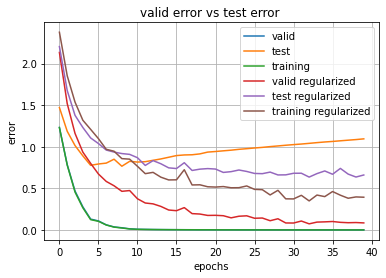

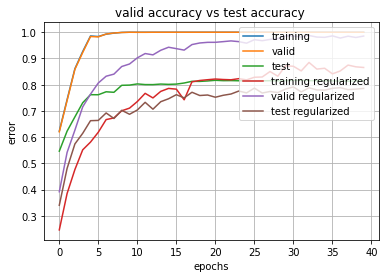

In [47]:
plt.figure()

plt.title("valid error vs test error ")
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(valid_err, label = "valid")
plt.plot(test_err , label = "test")
plt.plot(train_err , label = "training")
plt.plot(valid_err_regularized, label = "valid regularized")
plt.plot(test_err_regularized , label = "test regularized")
plt.plot(train_err_regularized , label = "training regularized")
plt.legend(loc='upper right')
plt.grid()
plt.show()
plt.figure()
plt.title("valid accuracy vs test accuracy ")
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(accuracy_train, label = "training")
plt.plot(accuracy_valid, label = "valid")
plt.plot(accuracy_test , label = "test")
plt.plot(accuracy_train_regularized, label = "training regularized")
plt.plot(accuracy_valid_regularized, label = "valid regularized")
plt.plot(accuracy_test_regularized , label = "test regularized")
plt.legend(loc='upper right')
plt.grid()
plt.show()


As we know drop out is a kind of regularization. regularization is used for generalizing the model. in other word it reduces the chance of overfitting. according to the above explenation after using drop out we expect that the training error would increase and the test error would decrease (to avoid the chance of overfitting) .the above plots are completely agree with the above explenation(also for test and training acc). as we see the training error increased and the test error decreased. 

## 4.Batch normalization

In [21]:
epsilon = 0.001
tf.reset_default_graph()
input_image=tf.placeholder(dtype=tf.float32, shape=(None, 784), name='input')
inputsize = 784
layer1size = 512
layer2size = 512
layer3size = 512
layer4size = 25
O1 = FCN_Batch_norm(input_image,layer1size,name='layer1',stddev1=np.sqrt(4/(inputsize+layer1size)),epsilon=epsilon,relu=True)
O2 = FCN_Batch_norm(O1,layer2size,name='layer2',relu=True ,stddev1=np.sqrt(4/(layer1size+layer2size)),epsilon=epsilon)
O3 = FCN_Batch_norm(O2,layer3size,name='layer3',relu=True ,stddev1=np.sqrt(4/(layer2size+layer3size)),epsilon=epsilon)
O4 = FCn0(O3,layer4size,name='layer4',relu=False ,stddev1=np.sqrt(4/(layer3size+layer4size)))
output_image=tf.placeholder(dtype=tf.float32, shape=(None, 25),name='OUTPUT')

In [22]:
loss_Batch= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= O4,name='LOSS'))
accuracy_Batch = tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(O4,axis=1),tf.argmax(output_image, axis=1)),dtype=tf.float32))
adam_Batch=tf.train.AdamOptimizer (learning_rate=0.0005, name='adam').minimize(loss_Batch)

In [23]:
Y= pd.read_csv("Q1_test.csv", sep = ',')
Y_feautures = Y.iloc[:,1:785]/255
Y_label = Y.iloc[:,0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    Y_label_train_one_hot = sess.run(tf.one_hot(Y_label, 25))
    f_test={input_image:Y_feautures , output_image:Y_label_train_one_hot}

In [24]:
batchsize = 150
epoch_num = 40
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer()) 
valid_err_Batch = np.zeros(epoch_num)
test_err_Batch =  np.zeros(epoch_num)
accuracy_valid_Batch = np.zeros(epoch_num)
accuracy_test_Batch = np.zeros(epoch_num)
train_err_Batch = np.zeros(epoch_num)
accuracy_train_Batch = np.zeros(epoch_num)
for epoch in range(epoch_num):
    print('==================================================')
    print('====== Epoch=%s =================================== ' %(epoch))
    print('==================================================')
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:X_features_train[i*batchsize : (i+1)*batchsize] , 
          output_image:X_label_train_one_hot[i*batchsize : (i+1)*batchsize] }
        sess.run(adam_Batch,feed_dict=f)
    print("iter {}: \t Loss={:.6f} \t Training Accuaracy={:.6f}".format(i,sess.run(loss_Batch,feed_dict=f),sess.run(accuracy_Batch,feed_dict=f)))    
    f_valid={input_image:X_features_valid , output_image:X_label_valid_one_hot}
    f_train={input_image:X_features_train , output_image:X_label_train_one_hot}
    valid_err_Batch[epoch] = sess.run(loss_Batch,feed_dict=f_valid)
    test_err_Batch[epoch] = sess.run(loss_Batch,feed_dict=f_test)
    train_err_Batch[epoch] = sess.run(loss_Batch,feed_dict=f_train)
    accuracy_valid_Batch[epoch] =  sess.run(accuracy_Batch,feed_dict=f_valid)
    accuracy_test_Batch[epoch] =  sess.run(accuracy_Batch,feed_dict=f_test)
    accuracy_train_Batch[epoch] =  sess.run(accuracy_Batch,feed_dict=f_train)
    print("-----------------------------------------------------")
    print('Epoch:{} \t Validation Loss:{:.6f} \t Validation accuaracy:{:.6f} '.format(epoch,valid_err_Batch[epoch],accuracy_valid_Batch[epoch]))
    print('Epoch:{} \t test Loss:{:.6f}       \t test accuaracy:{:.6f} '.format(epoch,test_err_Batch[epoch],accuracy_test_Batch[epoch]))
    print('Epoch:{} \t training Loss:{:.6f}   \t Training accuaracy:{:.6f} '.format(epoch,train_err_Batch[epoch],accuracy_train_Batch[epoch]))
    print("-----------------------------------------------------")

C:\Users\Sun Media\.conda\envs\DL\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


====== Epoch=0 =================================== 
iter 127: 	 Loss=0.032833 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:0 	 Validation Loss:0.026608 	 Validation accuaracy:0.999879 
Epoch:0 	 test Loss:0.660300       	 test accuaracy:0.803542 
Epoch:0 	 training Loss:0.022922   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=1 =================================== 
iter 127: 	 Loss=0.008266 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:1 	 Validation Loss:0.006683 	 Validation accuaracy:1.000000 
Epoch:1 	 test Loss:0.639623       	 test accuaracy:0.809537 
Epoch:1 	 training Loss:0.005656   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=2 =================================== 
iter 127: 	 Loss=0.004271 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:2 	 Vali

iter 127: 	 Loss=0.000184 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:16 	 Validation Loss:0.000143 	 Validation accuaracy:1.000000 
Epoch:16 	 test Loss:0.698400       	 test accuaracy:0.819297 
Epoch:16 	 training Loss:0.000111   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=17 =================================== 
iter 127: 	 Loss=0.000163 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:17 	 Validation Loss:0.000127 	 Validation accuaracy:1.000000 
Epoch:17 	 test Loss:0.702090       	 test accuaracy:0.820413 
Epoch:17 	 training Loss:0.000098   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=18 =================================== 
iter 127: 	 Loss=0.000145 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:18 	 Validation Loss:0.000113 	 Validation accuaracy

iter 127: 	 Loss=0.000039 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:32 	 Validation Loss:0.000030 	 Validation accuaracy:1.000000 
Epoch:32 	 test Loss:0.750878       	 test accuaracy:0.818879 
Epoch:32 	 training Loss:0.000022   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=33 =================================== 
iter 127: 	 Loss=0.000036 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:33 	 Validation Loss:0.000027 	 Validation accuaracy:1.000000 
Epoch:33 	 test Loss:0.753887       	 test accuaracy:0.818600 
Epoch:33 	 training Loss:0.000020   	 Training accuaracy:1.000000 
-----------------------------------------------------
====== Epoch=34 =================================== 
iter 127: 	 Loss=0.000033 	 Training Accuaracy=1.000000
-----------------------------------------------------
Epoch:34 	 Validation Loss:0.000025 	 Validation accuaracy

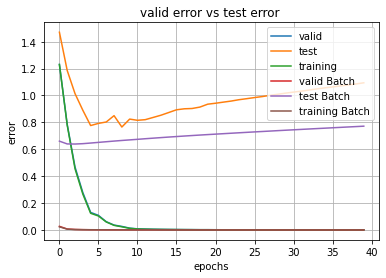

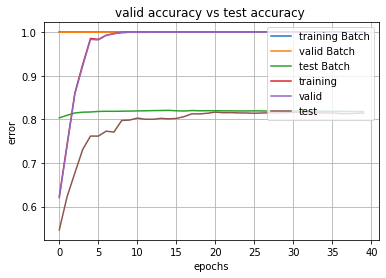

In [50]:
plt.figure()

plt.title("valid error vs test error ")
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(valid_err, label = "valid")
plt.plot(test_err , label = "test")
plt.plot(train_err , label = "training")
plt.plot(valid_err_Batch, label = "valid Batch")
plt.plot(test_err_Batch , label = "test Batch")
plt.plot(train_err_Batch , label = "training Batch")
plt.legend(loc='upper right')
plt.grid()
plt.show()
plt.figure()
plt.title("valid accuracy vs test accuracy ")
plt.xlabel("epochs")
plt.ylabel("error")
plt.plot(accuracy_train_Batch, label = "training Batch")
plt.plot(accuracy_valid_Batch, label = "valid Batch")
plt.plot(accuracy_test_Batch , label = "test Batch")
plt.plot(accuracy_train, label = "training")
plt.plot(accuracy_valid, label = "valid")
plt.plot(accuracy_test , label = "test")
plt.legend(loc='upper right')
plt.grid()
plt.show()


As we know from the class Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. in the above plots we compared this network with the initial network. these are completely agree with the above explenation.   

### 5.Uniform sampling and confusion matrix

In [26]:
tf.reset_default_graph()
inputsize = 784
layer1size = 512
layer2size = 512
layer3size = 512
layer4size = 25
input_image=tf.placeholder(dtype=tf.float32, shape=(None, 784), name='INPUT_sina')
O1 = FCn0(input_image,layer1size,name='layer1',stddev1=np.sqrt(4/(inputsize+layer1size)),relu=True)
O2 = FCn0(O1,layer2size,name='layer2',relu=True ,stddev1=np.sqrt(4/(layer1size+layer2size)))
O3 = FCn0(O2,layer3size,name='layer3',relu=True ,stddev1=np.sqrt(4/(layer2size+layer3size)))
O4 = FCn0(O3,layer4size,name='layer4_sina',relu=False ,stddev1=np.sqrt(4/(layer3size+layer4size)))
output_image=tf.placeholder(dtype=tf.float32, shape=(None, 25),name='OUTPUT_sina')


In [27]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= O4,name='LOSS'))
accuracy = tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(O4,axis=1),tf.argmax(output_image, axis=1)),dtype=tf.float32))
adam=tf.train.AdamOptimizer (learning_rate=0.0005, name='adam').minimize(loss)

In [28]:
Y= pd.read_csv("Q1_test.csv", sep = ',')
Y_feautures = Y.iloc[:,1:785]/255
Y_label = Y.iloc[:,0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    Y_label_train_one_hot = sess.run(tf.one_hot(Y_label, 25))
    f_test={input_image:Y_feautures , output_image:Y_label_train_one_hot}    

In [29]:
batchsize = 150
epoch_num = 10
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    valid_err = np.zeros(epoch_num)
    test_err =  np.zeros(epoch_num)
    accuracy_valid = np.zeros(epoch_num)
    accuracy_test = np.zeros(epoch_num)
    train_err = np.zeros(epoch_num)
    accuracy_train = np.zeros(epoch_num)
    for epoch in range(epoch_num):
        print('==================================================')
        print('====== Epoch=%s =================================== ' %(epoch))
        print('==================================================')
        for i in range(math.floor(num_train/batchsize)):
            f={input_image:X_features_train[i*batchsize : (i+1)*batchsize] , 
              output_image:X_label_train_one_hot[i*batchsize : (i+1)*batchsize] }
            sess.run(adam,feed_dict=f)
        print("iter {}: \t Loss={:.6f} \t Training Accuaracy={:.6f}".format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))    
        f_valid={input_image:X_features_valid , output_image:X_label_valid_one_hot}
        f_train={input_image:X_features_train , output_image:X_label_train_one_hot}
        valid_err[epoch] = sess.run(loss,feed_dict=f_valid)
        test_err[epoch] = sess.run(loss,feed_dict=f_test)
        train_err[epoch] = sess.run(loss,feed_dict=f_train)
        accuracy_valid[epoch] =  sess.run(accuracy,feed_dict=f_valid)
        accuracy_test[epoch] =  sess.run(accuracy,feed_dict=f_test)
        accuracy_train[epoch] =  sess.run(accuracy,feed_dict=f_train)
        print("-----------------------------------------------------")
        print('Epoch:{} \t Validation Loss:{:.6f} \t Validation accuaracy:{:.6f} '.format(epoch,valid_err[epoch],accuracy_valid[epoch]))
        print('Epoch:{} \t test Loss:{:.6f}       \t test accuaracy:{:.6f} '.format(epoch,test_err[epoch],accuracy_test[epoch]))
        print('Epoch:{} \t training Loss:{:.6f}   \t Training accuaracy:{:.6f} '.format(epoch,train_err[epoch],accuracy_train[epoch]))
        print("-----------------------------------------------------")
    saver = tf.train.Saver()
    saver.save(sess, './models/my_test_model')

====== Epoch=0 =================================== 
iter 127: 	 Loss=1.302427 	 Training Accuaracy=0.660000
-----------------------------------------------------
Epoch:0 	 Validation Loss:1.194847 	 Validation accuaracy:0.653473 
Epoch:0 	 test Loss:1.476908       	 test accuaracy:0.536949 
Epoch:0 	 training Loss:1.195935   	 Training accuaracy:0.654717 
-----------------------------------------------------
====== Epoch=1 =================================== 
iter 127: 	 Loss=0.795095 	 Training Accuaracy=0.806667
-----------------------------------------------------
Epoch:1 	 Validation Loss:0.726253 	 Validation accuaracy:0.790675 
Epoch:1 	 test Loss:1.169048       	 test accuaracy:0.627161 
Epoch:1 	 training Loss:0.714763   	 Training accuaracy:0.794422 
-----------------------------------------------------
====== Epoch=2 =================================== 
iter 127: 	 Loss=0.441090 	 Training Accuaracy=0.886667
-----------------------------------------------------
Epoch:2 	 Vali

In [30]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./models/my_test_model.meta')
    saver.restore(sess,"./models/my_test_model" )
    f_train={"INPUT_sina:0":X_features_train }
    y_pred =sess.run(("O_layer4_sina:0"), feed_dict = f_train)
    y_pred = np.argmax(y_pred, axis=1)
    a= sess.run(tf.confusion_matrix(X_label_train, y_pred, num_classes=25, dtype=tf.dtypes.float32, name=None,weights=None))
    
    

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./models/my_test_model


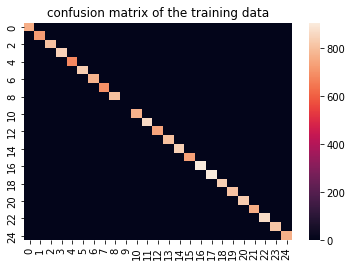

the best estimated letter on training data is: R and its class numbers is: 17
num_dastaset new:	26419 
num_valid new:	7925 
num_train new:	18494 
X_features_train new:	(18494, 784) 
X_label_train new:	(7925, 784) 
X_features_valid new:	(18494,) 
X_label_valid new:	(7925,) 


In [31]:
## plotting the heatmap
plt.figure()
sn.heatmap(a)
plt.title("confusion matrix of the training data")
plt.show()
## finding the best class 
b = np.diag(a)
bestClass = np.argmax(b)
print("the best estimated letter on training data is:",chr(ord('@')+np.argmax(b) + 1),"and its class numbers is:",np.argmax(b))
## creating the new dataset
W = X.loc[X.label==bestClass]
W_ow = X.loc[X.label!=bestClass]
size_selected = int(len(W)/5)
arr = np.arange(len(W))
selected_vec =  np.random.choice(arr, size=size_selected) 
W_selected = W.iloc[selected_vec]
frames = [W_ow, W_selected]
result = pd.concat(frames)
### splitting data into features and labels
X_features_new = result.iloc[:, 1:].to_numpy() / 255
X_label_new = result.iloc[:, 0].to_numpy()
### shuffling the data
with tf.Session() as sess:
    X_features_shuffle_new = sess.run(tf.random.shuffle(X_features_new, seed=12321 ))
    X_label_shuffle_new = sess.run(tf.random.shuffle(X_label_new, seed=12321 ))
###
train2valid_spliter_ratio_new = 0.3
num_dastaset_new= X_features_shuffle_new.shape[0]
num_valid_new= int(train2valid_spliter_ratio_new*num_dastaset_new)
num_train_new=num_dastaset_new-num_valid_new
###
X_features_train_new = X_features_shuffle_new[:num_train_new]
X_label_train_new = X_label_shuffle_new[:num_train_new]
X_features_valid_new = X_features_shuffle_new[num_train_new:]
X_label_valid_new = X_label_shuffle_new[num_train_new:]
##
with tf.Session() as sess:
    X_label_train_one_hot_new = sess.run(tf.one_hot(X_label_train_new, 25))
    X_label_valid_one_hot_new = sess.run(tf.one_hot(X_label_valid_new, 25))
##
print("num_dastaset new:\t{} ". format(num_dastaset_new))
print("num_valid new:\t{} ".format(num_valid_new))
print("num_train new:\t{} ".format(num_train_new))
print("X_features_train new:\t{} ".format(X_features_train_new.shape))
print("X_label_train new:\t{} ".format(X_features_valid_new.shape))
print("X_features_valid new:\t{} ".format(X_label_train_new.shape))
print("X_label_valid new:\t{} ".format(X_label_valid_new.shape))


INFO:tensorflow:Restoring parameters from ./models/my_test_model


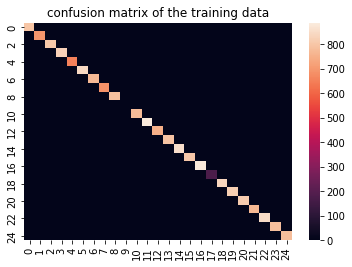

In [32]:
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./models/my_test_model.meta')
    saver.restore(sess,"./models/my_test_model" )
    f_train={"INPUT_sina:0":X_features_train_new }
    y_pred_new =sess.run(("O_layer4_sina:0"), feed_dict = f_train)
    y_pred_new = np.argmax(y_pred_new, axis=1)
    a_unbalanced= sess.run(tf.confusion_matrix(X_label_train_new, y_pred_new, num_classes=25, dtype=tf.dtypes.float32, name=None,weights=None))
## plotting the heatmap
plt.figure()
sn.heatmap(a_unbalanced)
plt.title("confusion matrix of the training data")
plt.show()


in the first confusion matrix the best estimated letter on training dataset was "R" and its class numbers was 17 but after calculating and plotting the second confusion matrix the diogonal element on the confusion matrix according to R has changed.(in bad way). this is caused because in the second part we used an unbalanced data.in other words unequal distribution of classes within a dataset cause this problem. for solving this issue scientists have implemented some approaches: 
1-Undersampling : it is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.
2- oversampling:It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class. SMTOE is the most common technique for using this qpproach. In this technique  it looks at the feature space for the minority class data points and considers its k nearest neighbours.

## 6. classifying using WEBCAM

In [35]:
import numpy as np
import tensorflow as tf
# switchd TF2 to TF1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./models/my_test_model.meta')
    saver.restore(sess,"./models/my_test_model" )
    import cv2
    disp_width = 640
    disp_higth = 480
    higth = 400
    width = 400
    cam = cv2.VideoCapture(0)
    cam.set(cv2.CAP_PROP_FRAME_WIDTH, disp_width)
    cam.set(cv2.CAP_PROP_FRAME_HEIGHT, disp_higth)
    cv2.namedWindow('WebCam')
    cv2.namedWindow('detecter')
    fnt = cv2.FONT_HERSHEY_DUPLEX
    while True:
        _, frame = cam.read()
        detecter = frame[int((disp_higth/2)-(higth/2)):int((disp_higth/2)+(higth/2)), int((disp_width/2)-(width/2)):int((disp_width/2)+(width/2))]
        frame = cv2.rectangle(frame, (int((disp_width/2)-(width/2)), int((disp_higth/2)-(higth/2))), (int((disp_width/2)+(width/2)), int((disp_higth/2)+(higth/2))), (0, 0, 0), 1)
        detecter = cv2.resize(detecter, (28, 28))
        gray = cv2.cvtColor(detecter, cv2.COLOR_BGR2GRAY)
        X_features = gray.reshape((1, 784)) / 255
        f_train={"INPUT_sina:0":X_features}
        y_pred=np.argmax((sess.run(("O_layer4_sina:0"), feed_dict = f_train)) , axis=1) 
        distinguished_letter = chr(ord('@')+y_pred + 1)
        frame = cv2.putText(frame, distinguished_letter, (int((disp_higth/2)+(higth/2))+50, int(disp_width/2)), fnt, 1.5, (0, 0, 0))
        cv2.moveWindow('WebCam', 0, 0)
        cv2.imshow('WebCam', frame)
        if cv2.waitKey(1) == ord('e'): # when q is pressed, close the window. wait for 1ms
            break
    cam.release()
    cv2.destroyAllWindows()
    

INFO:tensorflow:Restoring parameters from ./models/my_test_model


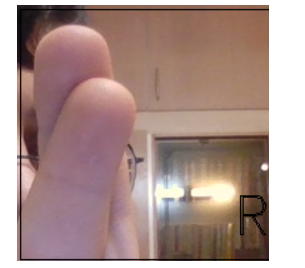

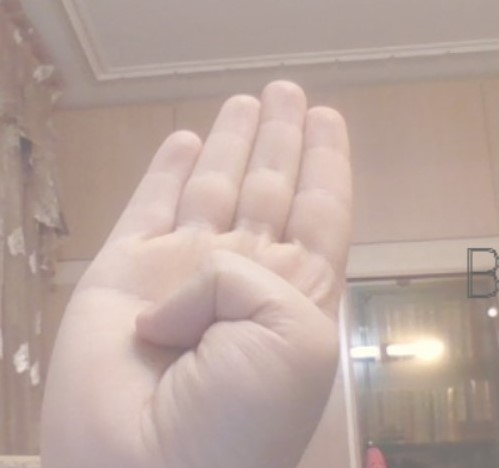

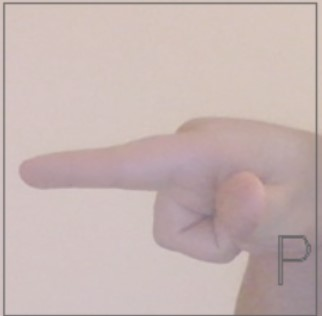

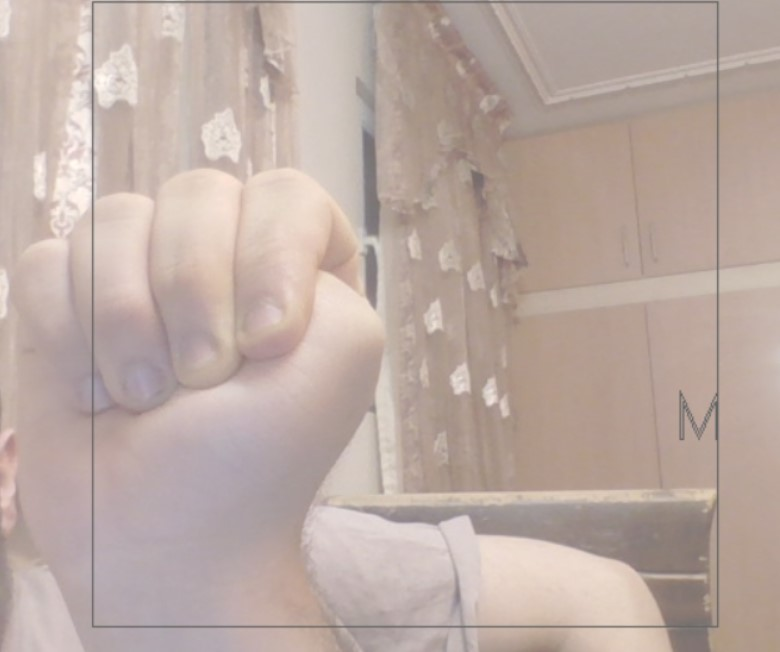

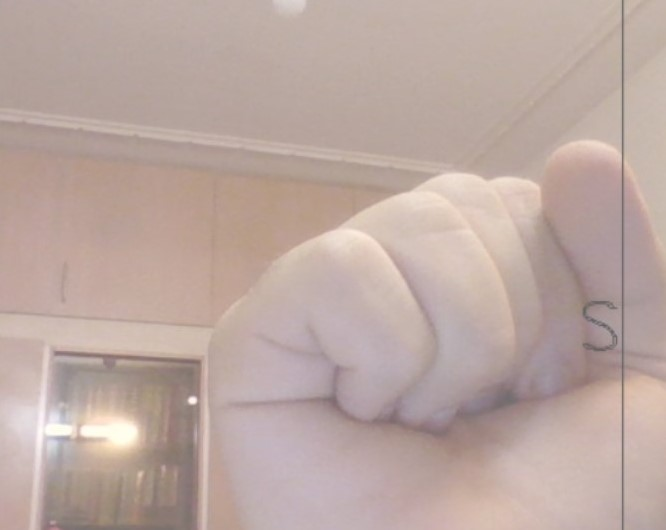